In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [27]:
# load the path of all .png files under sprites/ into a dataframe with the columns "path" and "size", where size is the size of the image in pixels (width x height)
def load_sprites():
    # get the path of all .png files under sprites/
    paths = []
    for root, dirs, files in os.walk("sprites/sprites/pokemon/"):
        for file in files:
            if file.endswith(".png"):
                paths.append(os.path.join(root, file))
    # get the size of each image
    sizes = []
    pbar = tqdm(paths)
    for path in paths:
        try:
            img = plt.imread(path)
            sizes.append(img.shape[1::-1])
            pbar.set_description(f"loading {path}")
            pbar.update(1)
        except:
            #remove the path from the list if the image is not readable
            sizes.append(np.nan)
            pbar.set_description(f"removing {path}")
            pbar.update(1)
    pbar.close()
    print(len(paths), len(sizes))
    # create a dataframe
    df = pd.DataFrame({"path": paths, "size": sizes})
    return df

df = load_sprites()

loading sprites/sprites/pokemon/269.png:   0%|          | 141/43491 [00:00<01:05, 666.15it/s]             

loading sprites/sprites/pokemon/versions/generation-iv/diamond-pearl/female/449.png: 100%|██████████| 43491/43491 [01:37<00:00, 447.01it/s]                       


43491 43491


,ratio,dim
count,39056.0,39056.000000
mean,1.0,145.485431
std,0.0,145.954346
min,1.0,32.000000
25%,1.0,80.000000
50%,1.0,96.000000
75%,1.0,120.000000
max,1.0,512.000000


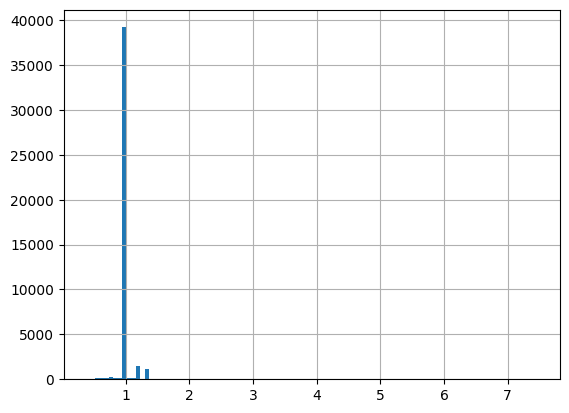

In [28]:
df = df.dropna()
df["ratio"]= df["size"].apply(lambda x: x[0]/x[1])
df["ratio"].hist(bins=100)
df= df[df["ratio"]==1.0]
df["dim"]= df["size"].apply(lambda x: x[0])
df.head()
df.describe()

(array([7.550e+02, 8.500e+02, 4.000e+00, 2.413e+03, 0.000e+00, 8.290e+02,
        3.140e+03, 6.000e+00, 2.000e+00, 3.400e+01, 8.337e+03, 0.000e+00,
        1.000e+00, 1.182e+04, 1.000e+00, 9.000e+00, 0.000e+00, 0.000e+00,
        2.037e+03, 0.000e+00, 3.150e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

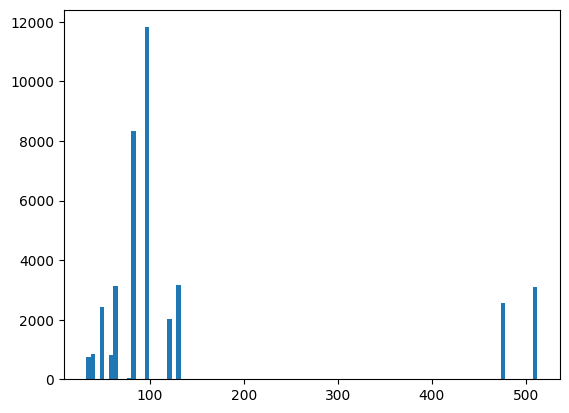

In [29]:
# plot a histogram of the image sizes
plt.hist(df["dim"], bins=100)

In [30]:
# create a "train" column, that takes 1 if the dim is <200, 0 otherwise
df["train"] = df["dim"]<200

In [31]:
# view the maximim dim for the train set
df[df["train"]]["dim"].max()

128

In [32]:
# view the files with similar filenames
df["filename"] = df["path"].apply(lambda x: x.split("/")[-1])
df["filename"].value_counts()
diffusion = df[df["train"]==True]
encoding = df[df["train"]==False]
# drop the columns with unique filenames, keep the duplicated, for the train colums only
diffusion = diffusion[diffusion["filename"].duplicated(keep=False)]
# save the datasets
diffusion.to_csv("diffusion.csv", index=False)
encoding.to_csv("encoding.csv", index=False)